In [38]:
import pandas as pd
import psutil
import time
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
import numpy as np

In [33]:
# Create an empty dictionary to store process details
meta_list = {}

def add_process(name, runtime, memory):
  """
  Adds a process to the meta list with its runtime and memory usage.

  Args:
      name: Name of the process (e.g., "Data loading", "Model training").
      runtime: Time taken for the process in seconds.
      memory: Peak memory usage in bytes.
  """
  meta_list[name] = {"runtime": runtime, "memory": memory}


In [34]:

# Function to add process details to the meta list
def add_process(name, runtime, memory):
    meta_list[name] = {"runtime": runtime, "memory": memory}

# Function to measure memory usage
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss

In [35]:


# Start measuring time
start_time = time.time()

# Initialize PySpark session

# Load your dataset into a PySpark DataFrame (Replace 'your_dataset_path' with your actual dataset path)
a = pd.read_csv('/kaggle/input/adhd-data/Labelled/ADHD_NEGATIVE.csv')
b = pd.read_csv('/kaggle/input/adhd-data/Labelled/ADHD_POSITIVE.csv')

df = pd.concat([a,b])

# Calculate runtime
end_time = time.time()
runtime = end_time - start_time

# Measure memory usage after loading data into PySpark
memory_usage = get_memory_usage()

# Add data loading process to the meta list
add_process("Data Loading", runtime, memory_usage)

print('Runtime: ',runtime)
print('Memory_usage: ',memory_usage)

Runtime:  6.538346290588379
Memory_usage:  2341097472


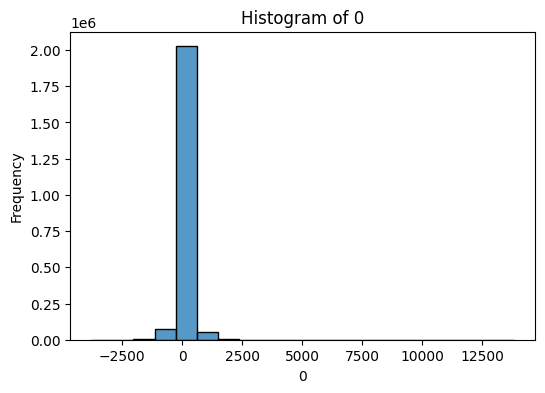

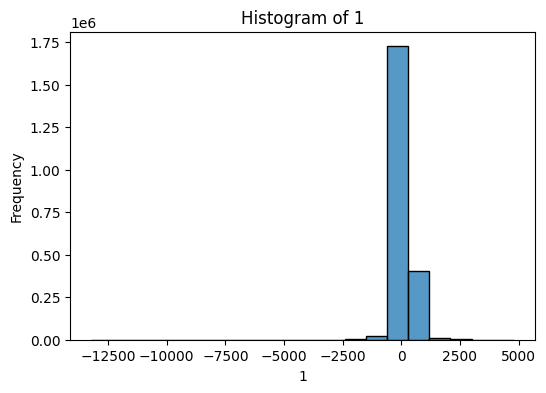

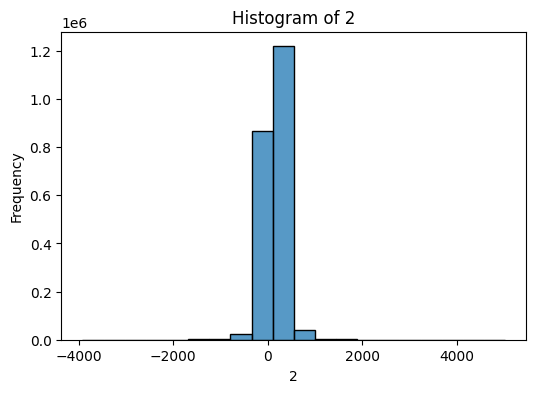

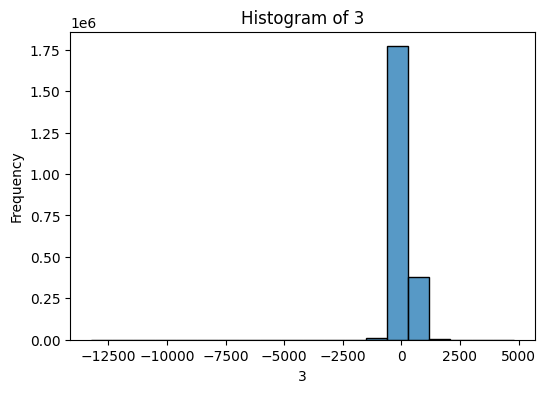

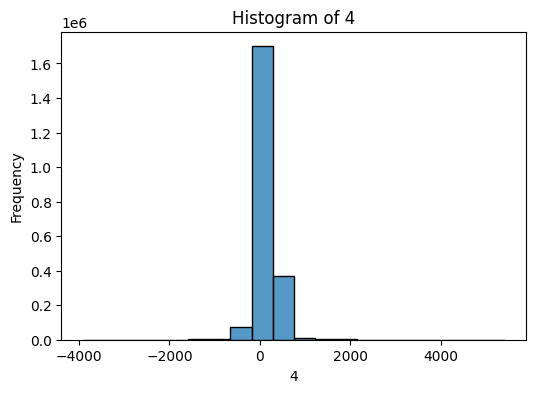

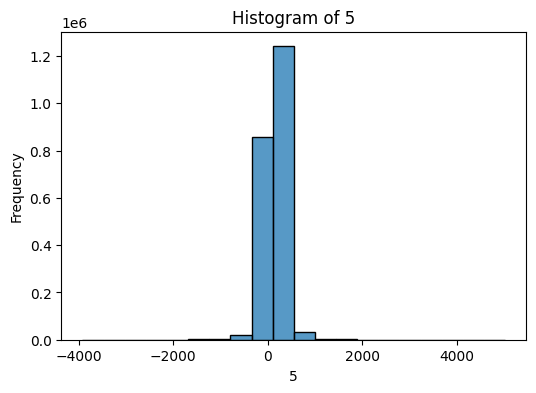

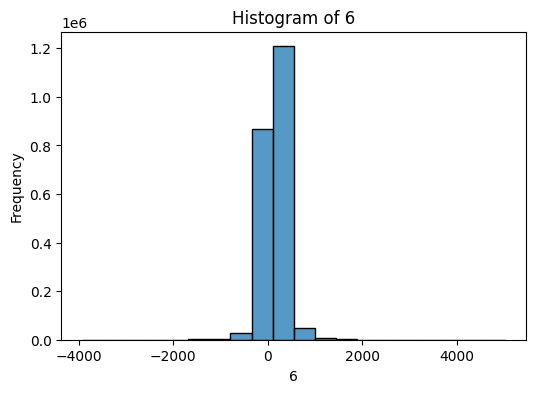

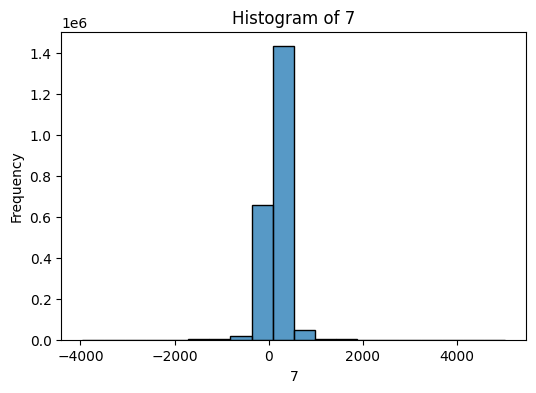

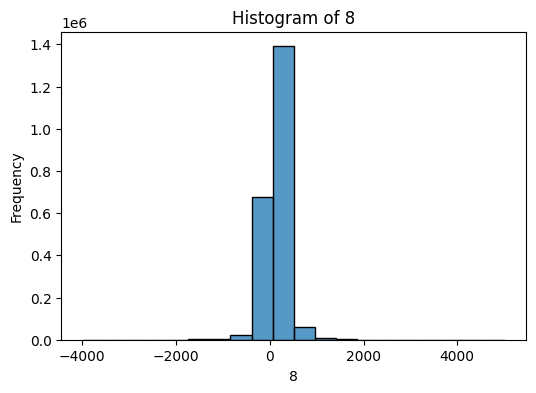

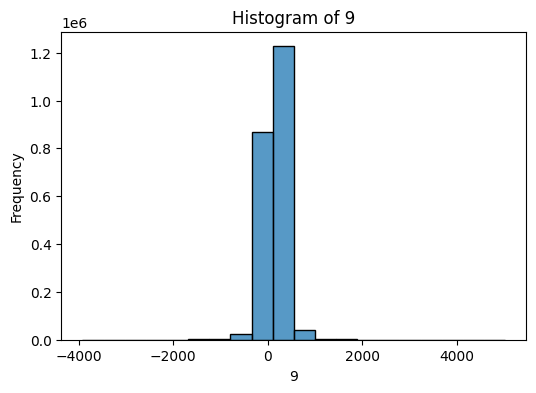

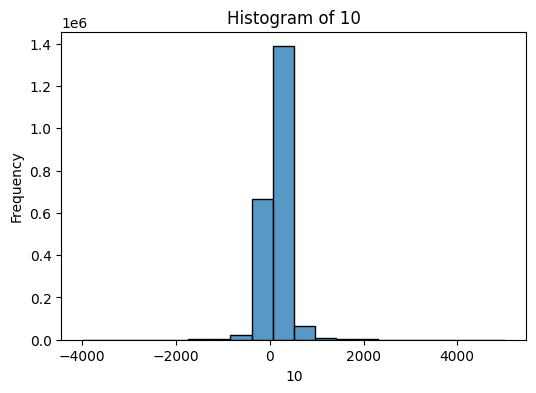

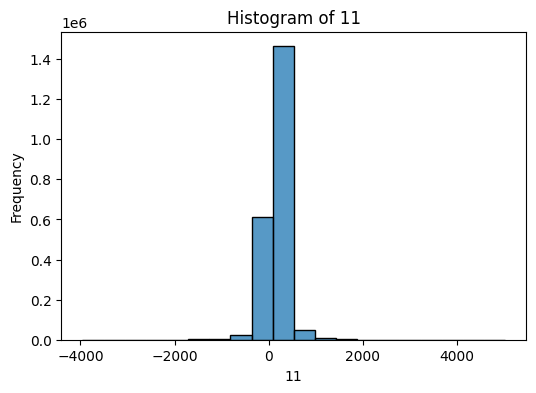

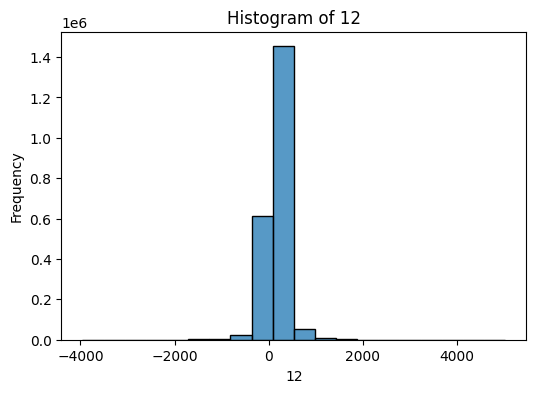

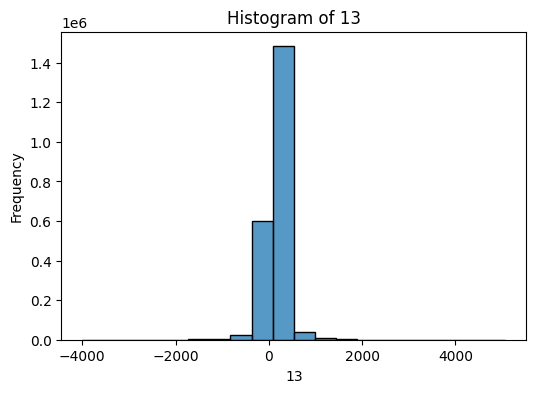

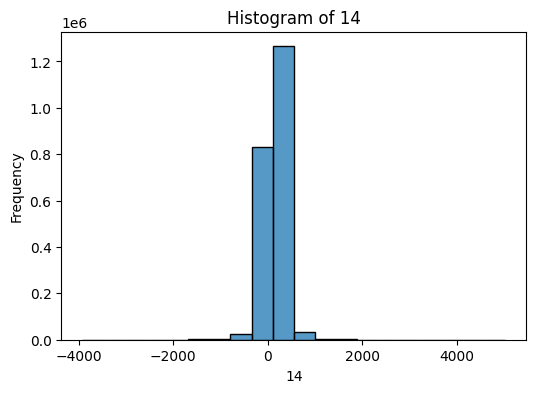

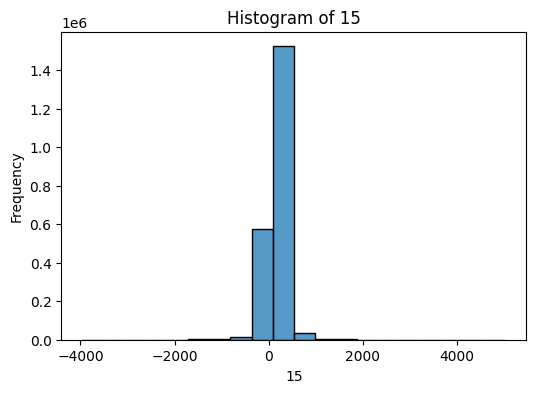

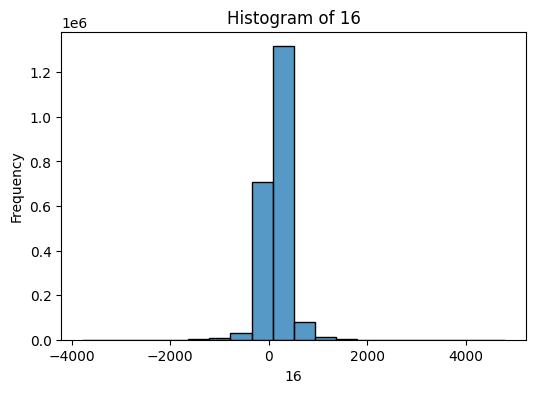

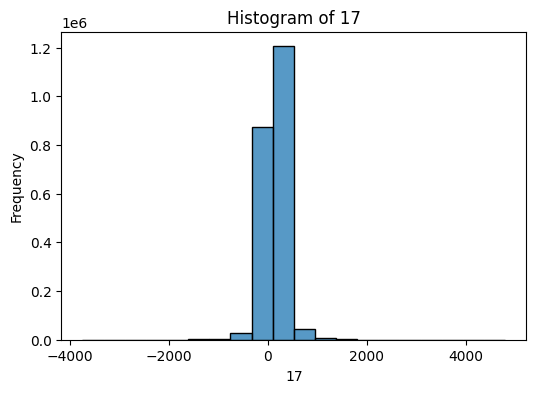

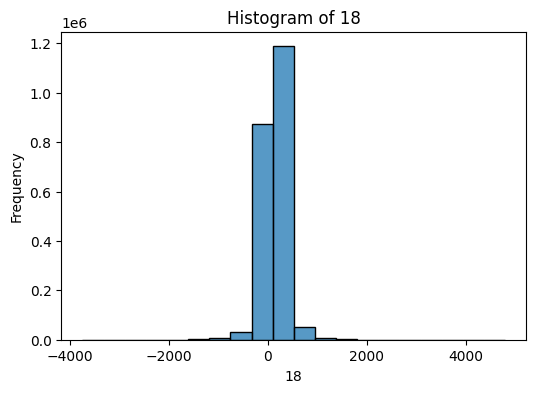

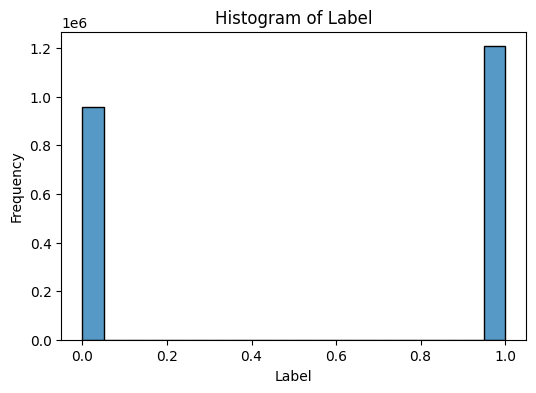

Runtime:  59.59929966926575
Memory_usage:  2550595584


In [36]:
start_time = time.time()

# Calculating statistical measures for Pandas DataFrame
describe_sklearn = df.describe()

# Visualizing data distribution with histograms for Pandas DataFrame
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Calculate runtime
end_time = time.time()
runtime = end_time - start_time

# Measure memory usage after loading data into PySpark
memory_usage = get_memory_usage()

# Add data loading process to the meta list
add_process("Histogram Distrubution", runtime, memory_usage)

print('Runtime: ',runtime)
print('Memory_usage: ',memory_usage)

In [50]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains your feature matrix and 'y' contains the target variable

start_time = time.time()

X = df.iloc[:, :-1]  # Features are all columns except the last one
y = df.iloc[:, -1]  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Adjust output size based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the neural network model
model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))

end_time = time.time()
runtime = end_time - start_time

# Measure memory usage after loading data into PySpark
memory_usage = get_memory_usage()

# Add data loading process to the meta list
add_process("Training the model", runtime, memory_usage)

print('Runtime: ',runtime)
print('Memory_usage: ',memory_usage)

Epoch 1/5
54160/54160 [==============================] - 114s 2ms/step - loss: 0.5005 - accuracy: 0.7587 - val_loss: 0.4783 - val_accuracy: 0.7713
Epoch 2/5
54160/54160 [==============================] - 112s 2ms/step - loss: 0.4717 - accuracy: 0.7763 - val_loss: 0.4656 - val_accuracy: 0.7796
Epoch 3/5
54160/54160 [==============================] - 112s 2ms/step - loss: 0.4628 - accuracy: 0.7818 - val_loss: 0.4583 - val_accuracy: 0.7857
Epoch 4/5
54160/54160 [==============================] - 111s 2ms/step - loss: 0.4576 - accuracy: 0.7849 - val_loss: 0.4560 - val_accuracy: 0.7865
Epoch 5/5
54160/54160 [==============================] - 110s 2ms/step - loss: 0.4545 - accuracy: 0.7866 - val_loss: 0.4550 - val_accuracy: 0.7869
Runtime:  59.59929966926575
Memory_usage:  4217520128


In [52]:

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Accuracy - Scikit-learn TensorFlow Neural Network: {accuracy:.4f}")


13540/13540 [==============================] - 20s 1ms/step - loss: 0.4550 - accuracy: 0.7869
Accuracy - Scikit-learn TensorFlow Neural Network: 0.7869


In [59]:
meta_df = pd.DataFrame.from_dict(meta_list, orient='index')

# Save the DataFrame to a CSV file
meta_df.to_csv('meta_data-sklearn.csv')